In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [42]:
df = pd.read_csv("Unemployment in India.csv")

In [43]:
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [44]:
df.tail()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
763,NaN,NaN,NaN,NaN,NaN,NaN,NaN
764,NaN,NaN,NaN,NaN,NaN,NaN,NaN
765,NaN,NaN,NaN,NaN,NaN,NaN,NaN
766,NaN,NaN,NaN,NaN,NaN,NaN,NaN
767,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
df.shape

(768, 7)

In [46]:
df.size

5376

In [47]:
df.isna().sum()

Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64

In [48]:
df.dropna(inplace=True)

In [49]:
df.shape

(740, 7)

In [50]:
df.size

5180

In [51]:
df.info

<bound method DataFrame.info of              Region         Date  Frequency   Estimated Unemployment Rate (%)  \
0    Andhra Pradesh   31-05-2019    Monthly                              3.65   
1    Andhra Pradesh   30-06-2019    Monthly                              3.05   
2    Andhra Pradesh   31-07-2019    Monthly                              3.75   
3    Andhra Pradesh   31-08-2019    Monthly                              3.32   
4    Andhra Pradesh   30-09-2019    Monthly                              5.17   
..              ...          ...        ...                               ...   
749     West Bengal   29-02-2020    Monthly                              7.55   
750     West Bengal   31-03-2020    Monthly                              6.67   
751     West Bengal   30-04-2020    Monthly                             15.63   
752     West Bengal   31-05-2020    Monthly                             15.22   
753     West Bengal   30-06-2020    Monthly                              9.86

In [52]:
df.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
count,740.000000,7.400000e+02,740.000000
mean,11.787946,7.204460e+06,42.630122
std,10.721298,8.087988e+06,8.111094
min,0.000000,4.942000e+04,13.330000
25%,4.657500,1.190404e+06,38.062500
50%,8.350000,4.744178e+06,41.160000
75%,15.887500,1.127549e+07,45.505000
max,76.740000,4.577751e+07,72.570000


In [53]:
df.columns

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')

In [54]:
df.columns=df.columns.str.strip()

In [55]:
df.columns=df.columns.str.replace(' ','_')

In [56]:
df.columns

Index(['Region', 'Date', 'Frequency', 'Estimated_Unemployment_Rate_(%)',
       'Estimated_Employed', 'Estimated_Labour_Participation_Rate_(%)',
       'Area'],
      dtype='object')

In [57]:
df['Data'] = pd.to_datetime(df['Date'])

In [65]:
df['Region'].value_counts()

Andhra Pradesh      28
Kerala              28
West Bengal         28
Uttar Pradesh       28
Tripura             28
Telangana           28
Tamil Nadu          28
Rajasthan           28
Punjab              28
Odisha              28
Madhya Pradesh      28
Maharashtra         28
Karnataka           28
Jharkhand           28
Himachal Pradesh    28
Haryana             28
Gujarat             28
Delhi               28
Chhattisgarh        28
Bihar               28
Meghalaya           27
Uttarakhand         27
Assam               26
Puducherry          26
Goa                 24
Jammu & Kashmir     21
Sikkim              17
Chandigarh          12
Name: Region, dtype: int64

In [59]:
px.bar(df,x=df['Region'].value_counts().keys(),y=df['Region'].value_counts(),color=df['Region'].value_counts().keys(),
       title='Region Counts')

In [60]:
px.pie(df,names=df['Region'].value_counts().keys(),values=df['Region'].value_counts(),color=df['Region'].value_counts().keys(),
       title='Region %age')

In [61]:
df['Area'].value_counts()

Urban    381
Rural    359
Name: Area, dtype: int64

In [62]:
px.bar(df,x=df['Area'].value_counts().keys(),y=df['Area'].value_counts(),color=df['Area'].value_counts().keys(),
       title='Area Counts')

In [63]:
px.pie(df,names=df['Area'].value_counts().keys(),values=df['Area'].value_counts(),color=df['Area'].value_counts().keys(),
       title='Area %age')

In [66]:
df['Estimated_Unemployment_Rate_(%)'].value_counts(dropna=False)

0.00     11
3.31      4
12.50     3
5.45      3
6.67      3
         ..
13.70     1
4.03      1
40.59     1
3.69      1
9.86      1
Name: Estimated_Unemployment_Rate_(%), Length: 624, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

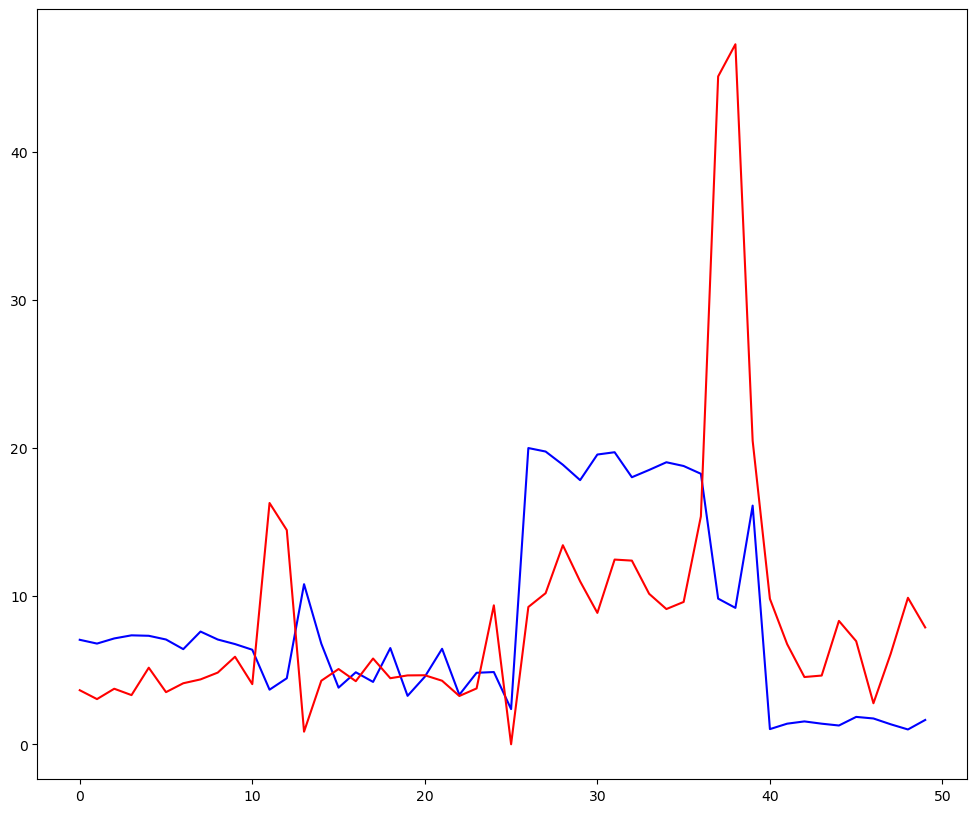

In [67]:
Employed = df['Estimated_Employed'].iloc[:50]
Unemployed = df['Estimated_Unemployment_Rate_(%)'].iloc[:50]

#normalize the employed in range 1 to 20
Employed = (Employed - Employed.min())/(Employed.max() - Employed.min()) * 19 + 1

plt.figure(figsize=(12,10))
plt.plot(Employed, label='Employed', color='blue')
plt.plot(Unemployed, label='Unemployed', color='red')
plt.show

In [68]:
df[['Day','Month','Year']] = df.Date.str.split("-",expand=True,)
df = df.drop(['Date'], axis=1)
df

,Region,Frequency,Estimated_Unemployment_Rate_(%),Estimated_Employed,Estimated_Labour_Participation_Rate_(%),Area,Data,Day,Month,Year
0,Andhra Pradesh,Monthly,3.65,11999139.0,43.24,Rural,2019-05-31,31,05,2019
1,Andhra Pradesh,Monthly,3.05,11755881.0,42.05,Rural,2019-06-30,30,06,2019
2,Andhra Pradesh,Monthly,3.75,12086707.0,43.50,Rural,2019-07-31,31,07,2019
3,Andhra Pradesh,Monthly,3.32,12285693.0,43.97,Rural,2019-08-31,31,08,2019
4,Andhra Pradesh,Monthly,5.17,12256762.0,44.68,Rural,2019-09-30,30,09,2019
...,...,...,...,...,...,...,...,...,...,...
749,West Bengal,Monthly,7.55,10871168.0,44.09,Urban,2020-02-29,29,02,2020
750,West Bengal,Monthly,6.67,10806105.0,43.34,Urban,2020-03-31,31,03,2020
751,West Bengal,Monthly,15.63,9299466.0,41.20,Urban,2020-04-30,30,04,2020
752,West Bengal,Monthly,15.22,9240903.0,40.67,Urban,2020-05-31,31,05,2020


In [70]:
group = df.groupby(['Region','Area']).agg({'Estimated_Unemployment_Rate_(%)': 'mean'})
group

Estimated_Unemployment_Rate_(%)
Region           Area                                  
Andhra Pradesh   Rural                         5.526429
                 Urban                         9.427857
Assam            Rural                         4.490833
                 Urban                         8.088571
Bihar            Rural                        16.770000
                 Urban                        21.066429
Chandigarh       Urban                        15.991667
Chhattisgarh     Rural                         6.628571
                 Urban                        11.852143
Delhi            Rural                        15.258571
                 Urban                        17.732143
Goa              Rural                         8.390000
                 Urban                        10.158333
Gujarat          Rural                         5.917143
                 Urban                         7.410714
Haryana          Rural                        25.012857
                 Urban                        27.553571
Himachal Pradesh Rural                        15.504286
                 Urban                        21.576429
Jammu & Kashmir  Rural                        14.951818
                 Urban                        17.549000
Jharkhand        Rural                        15.221429
                 Urban                        25.948571
Karnataka        Rural                         7.224286
                 Urban                         6.127857
Kerala           Rural                        10.341429
                 Urban                         9.906429
Madhya Pradesh   Rural                         5.653571
                 Urban                         9.159286
Maharashtra      Rural                         6.810000
                 Urban                         8.305000
Meghalaya        Rural                         2.475000
                 Urban                         7.301538
Odisha           Rural                         6.612857
                 Urban                         4.702857
Puducherry       Rural                         7.263333
                 Urban                        12.745000
Punjab           Rural                        11.925000
                 Urban                        12.137143
Rajasthan        Rural                        10.927143
                 Urban                        17.189286
Sikkim           Rural                         5.080000
                 Urban                         8.153333
Tamil Nadu       Rural                         8.775714
                 Urban                         9.792857
Telangana        Rural                         7.863571
                 Urban                         7.612143
Tripura          Rural                        27.166429
                 Urban                        29.534286
Uttar Pradesh    Rural                        10.208571
                 Urban                        14.894286
Uttarakhand      Rural                         4.882308
                 Urban                         8.162143
West Bengal      Rural                         7.572143
                 Urban                         8.677143